Create, in your library/module, a protected function called '_f_protected' that creates a lambda function. The lambda function must receive a param 'x' and return a boolean True if 'x' is higher than 5.  Also, '_f_protected' must create a list ('l1') with 'list comprehesion' that generates a list from 0 to 15. Finally, 'f_protected' must return 'l1' filtered (with function 'filter') using the lambda function.

After that, create a decorator called "prepost". The decorator must receive an *args and a **kwargs argument. 

If in 'kwargs' there is a key called "url", then it must do the next:

    1. Open with pandas the url as 'csv'. The variable is called 'df'.
    2. Do what '_f_protected' does (the function wrapped with the decorator). Simply, call the function.
    3. Plot histograms of each column in 'df'.

----------

The url is:

http://winterolympicsmedals.com/medals.csv

Finally, use the decorator as follow and call the function:

In [10]:
import pandas as pd 
from functools import wraps 
import matplotlib as matplotlib

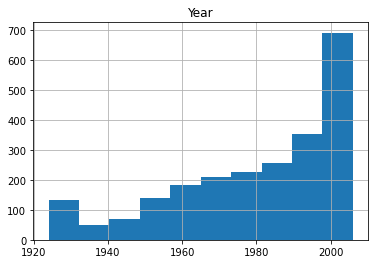

In [11]:
def prepost(url):
    def real_kwargs (function): #se pasa por parametro "url= .."(@pre)
        @wraps (function)
        def wrapper (*args, **kwargs): #est es _f_protected
            if kwargs.values:
                df=pd.read_csv(url)
                df
            retval= function (*args,**kwargs)
            df.hist()#te hace el histograma de todas los valores del df que sean numericos (en este caso "year", por eso sale solo el hist de year)
            return retval 
        return wrapper
    return real_kwargs



@prepost(url="http://winterolympicsmedals.com/medals.csv") #aqui dicc
def _f_protected(): 
    x_es_mayor_que_cinco = lambda x : x>5
    l1=[elem for elem in range(16)]
    y= list(filter(x_es_mayor_que_cinco,l1))
    return y
    

_f_protected()
filter_=_f_protected#esto es llamar a la funcion y lo que recibe se llama filter_